In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

from sklearn import metrics

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df2021 = pd.read_excel('C:/Users/dell/Downloads/solar_measurements_nigeria_bauchi_qc.xlsx',
                   sheet_name=['Daily Solar Irradiance Data', 'Hourly Solar Irradiance Data'])

daily_df2021 = df2021['Daily Solar Irradiance Data']
hourly_df2021 = df2021['Hourly Solar Irradiance Data']

In [3]:
df2022 = pd.read_excel('C:/Users/dell/Downloads/solar-measurements_nigeria-bauchi_qc_year2.xlsx',
                   sheet_name=['Daily Solar Irradiance Data', 'Hourly Solar Irradiance Data'])

daily_df2022 = df2022['Daily Solar Irradiance Data']
hourly_df2022 = df2022['Hourly Solar Irradiance Data']

In [4]:
daily_df = pd.concat([daily_df2021, daily_df2022], ignore_index=True, sort=False)

In [5]:
daily_df

,Date,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-09-20,567.778457,338.241801,301.328135,540.101447,540.167524,29.631672,61.879260,1.491801,2.218810,0.475402,112.751608,10.656592,947.101286,0.003215,0.0,56.933280,53.882154,NaN
1,2021-09-21,612.299493,416.508615,277.375338,582.300676,586.050169,30.591216,64.952196,2.252365,3.115203,0.558108,151.029561,10.961318,946.320946,0.003378,0.0,60.852872,51.598142,NaN
2,2021-09-22,273.871351,46.575946,257.215946,269.784865,271.773514,23.533243,91.272432,1.591622,2.449730,0.555405,186.108649,9.504324,947.551351,0.000000,1.2,35.082162,31.820000,NaN
3,2021-09-23,459.291452,127.545484,398.805645,436.126613,438.337581,27.244677,75.802419,1.695968,2.501129,0.542258,167.147258,10.426129,947.745161,0.003226,0.0,50.347419,47.425484,NaN
4,2021-09-24,610.936184,465.200822,257.588487,584.840954,589.787171,28.955263,64.560362,1.320066,2.006908,0.438651,124.336842,7.634704,947.917763,0.003289,0.0,61.070066,52.558224,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-09-15,470.193182,114.955070,372.390210,444.752972,452.372727,28.038636,70.820629,1.343007,1.948252,0.406993,84.573601,9.146503,947.921329,0.003497,0.0,51.695455,45.340385,NaN
726,2023-09-16,530.911661,295.801943,312.363251,497.695936,505.014134,27.372615,77.699293,2.646820,3.670141,0.644700,173.510071,15.003534,948.784452,0.001767,7.9,49.365371,43.863781,NaN
727,2023-09-17,432.378079,69.581837,374.484342,404.763883,411.938413,27.437370,77.027975,0.965136,1.586430,0.413570,141.974113,8.187683,949.014614,0.004175,0.1,48.425261,44.312526,NaN
728,2023-09-18,490.585178,174.496998,375.616135,461.335835,469.141463,25.379737,75.700750,1.825328,2.755159,0.609381,197.563039,12.596811,948.825516,0.003752,0.0,49.511632,43.345028,NaN


In [6]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           730 non-null    datetime64[ns]
 1   GHI            730 non-null    float64       
 2   DNI            730 non-null    float64       
 3   DHI            730 non-null    float64       
 4   ModA           730 non-null    float64       
 5   ModB           730 non-null    float64       
 6   Tamb           730 non-null    float64       
 7   RH             730 non-null    float64       
 8   WS             721 non-null    float64       
 9   WSgust         721 non-null    float64       
 10  WSstdev        721 non-null    float64       
 11  WD             725 non-null    float64       
 12  WDstdev        725 non-null    float64       
 13  BP             730 non-null    float64       
 14  Cleaning       730 non-null    float64       
 15  Precipitation  730 non-

In [7]:
# List of columns to drop
columns_to_drop = ['ModA', 'ModB', 'TModA', 'TModB', 'WSgust', 'WSstdev', 'WDstdev', 'Comments', 'Cleaning']

# Drop the columns
daily_df = daily_df.drop(columns=columns_to_drop)

In [8]:
daily_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           730 non-null    datetime64[ns]
 1   GHI            730 non-null    float64       
 2   DNI            730 non-null    float64       
 3   DHI            730 non-null    float64       
 4   Tamb           730 non-null    float64       
 5   RH             730 non-null    float64       
 6   WS             721 non-null    float64       
 7   WD             725 non-null    float64       
 8   BP             730 non-null    float64       
 9   Precipitation  730 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 57.2 KB


In [9]:
daily_df

,Date,GHI,DNI,DHI,Tamb,RH,WS,WD,BP,Precipitation
0,2021-09-20,567.778457,338.241801,301.328135,29.631672,61.879260,1.491801,112.751608,947.101286,0.0
1,2021-09-21,612.299493,416.508615,277.375338,30.591216,64.952196,2.252365,151.029561,946.320946,0.0
2,2021-09-22,273.871351,46.575946,257.215946,23.533243,91.272432,1.591622,186.108649,947.551351,1.2
3,2021-09-23,459.291452,127.545484,398.805645,27.244677,75.802419,1.695968,167.147258,947.745161,0.0
4,2021-09-24,610.936184,465.200822,257.588487,28.955263,64.560362,1.320066,124.336842,947.917763,0.0
...,...,...,...,...,...,...,...,...,...,...
725,2023-09-15,470.193182,114.955070,372.390210,28.038636,70.820629,1.343007,84.573601,947.921329,0.0
726,2023-09-16,530.911661,295.801943,312.363251,27.372615,77.699293,2.646820,173.510071,948.784452,7.9
727,2023-09-17,432.378079,69.581837,374.484342,27.437370,77.027975,0.965136,141.974113,949.014614,0.1
728,2023-09-18,490.585178,174.496998,375.616135,25.379737,75.700750,1.825328,197.563039,948.825516,0.0


C:\Users\dell\AppData\Local\Temp\ipykernel_4284\2361042381.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(daily_df.corr(), vmin=-1, vmax=1, annot=True)


Text(0.5, 1.0, 'Correlation Heatmap')

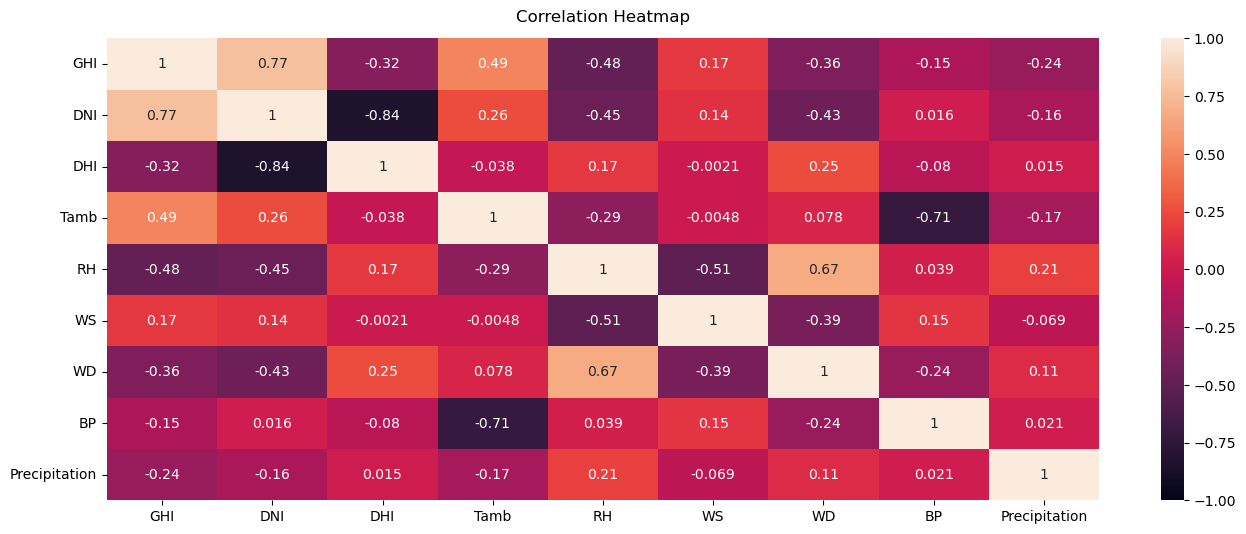

In [10]:
plt.figure(figsize=(16,6))

heatmap = sns.heatmap(daily_df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [11]:
daily_df = daily_df.dropna()

Daily Global Horizontal Irradiance

In [12]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_rf = daily_df.drop(columns = drop1)

y_rf = daily_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae

In [14]:
#rf = RandomForestRegressor(n_estimators=30)
#rf.fit(X_train, y_train)


rf = RandomForestRegressor(n_estimators=50)
fit = rf.fit(X_train,y_train)
predicted = rf.predict(X_test)


predicted = rf.predict(X_test)

expected = y_test

df_pred = pd.DataFrame({'Predicted':predicted, 'Actual':expected})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']


In [15]:
rf = RandomForestRegressor(n_estimators=50)
fit = rf.fit(X_train,y_train)
predicted = rf.predict(X_test)


predicted = rf.predict(X_test)

expected = y_test

df_pred = pd.DataFrame({'Predicted':predicted, 'Actual':expected})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']


In [16]:
df_pred['Accuracy']

259    -1.722134
667   -12.091859
77    -57.115622
65    -13.289490
81    -25.002436
         ...    
693     9.386052
627    49.160218
629   -16.985601
324   -71.347359
443   -27.919794
Name: Accuracy, Length: 217, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [18]:
print("MAPE: %r" % mape(expected, predicted))

MAPE: 0.09558263192783671


In [19]:
print("RMSE: %r" % np.sqrt(np.mean((df_pred["Accuracy"])**2)))

RMSE: 64.05201445735027


In [20]:
mae(expected, predicted)

49.213403661783175

 Daily Direct Normal Irradiance

In [21]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_rf_DNI = daily_df.drop(columns = drop1)

y_rf_DNI = daily_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_rf_DNI, y_rf_DNI, test_size=0.3, random_state=42)

In [22]:
rf = RandomForestRegressor(n_estimators= 7)
fit = rf.fit(X_train,y_train)

predicted_DNI = rf.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [23]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 1.1264978877008924


Daily Direct Horizontal Irradiance

In [24]:
X_rf_DHI = daily_df.drop(columns = drop1)

y_rf_DHI = daily_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_rf_DHI, y_rf_DHI, test_size=0.3, random_state=42)

In [25]:
rf = RandomForestRegressor(n_estimators= 50)
fit = rf.fit(X_train,y_train)

predicted_DHI = rf.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [26]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.2626610280078882


In [27]:
print("RMSE: %r" % np.sqrt(np.mean((df_pred["Accuracy"])**2)))

RMSE: 72.44708531958045


In [28]:
mae(expected, predicted)

49.213403661783175

XGBOOSTING

In [29]:
import xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [30]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_xgb = daily_df.drop(columns = drop1)

y_xgb = daily_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.3, random_state=42)

In [31]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [32]:
# define model evaluation method
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(model, X_xgb, y_xgb, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [ ]:
# fit model
model.fit(X_xgb, y_xgb)
# define new data
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
new_data = asarray([row])
# make a prediction
yhat = model.predict(new_data)
# summarize prediction
print('Predicted: %.3f' % yhat)

In [33]:
#rf = RandomForestRegressor(n_estimators= 50)
fit = model.fit(X_train,y_train)

predicted_GHI = model.predict(X_test)

expected_GHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_GHI, 'Actual':expected_GHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [34]:
print("MAPE: %r" % mape(expected_GHI, predicted_GHI))

MAPE: 0.10068966424891965


Direct natural Irradiance

In [35]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_xgb_DNI = daily_df.drop(columns = drop1)

y_xgb_DNI = daily_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb_DNI, y_xgb_DNI, test_size=0.3, random_state=42)

In [36]:
# create an xgboost regression model
xgb_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [37]:
fit = xgb_model.fit(X_train,y_train)

predicted_DNI = xgb_model.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [38]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 1.3220468163568773


In [39]:
print("RMSE: %r" % np.sqrt(np.mean((df_pred["Accuracy"])**2)))

RMSE: 177.2204175824991


In [40]:
mae(expected_DNI, predicted_DNI)

143.44201798827967

Direct Horizontal Irradiance

In [41]:
X_xgb_DHI = daily_df.drop(columns = drop1)

y_xgb_DHI = daily_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb_DHI, y_xgb_DHI, test_size=0.3, random_state=42)

In [42]:
fit = xgb_model.fit(X_train,y_train)

predicted_DHI = xgb_model.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [43]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.28912127334683674


In [44]:
print("RMSE: %r" % np.sqrt(np.mean((df_pred["Accuracy"])**2)))

RMSE: 80.64505996853828


In [45]:
mae(expected_DHI, predicted_DHI)

65.26560911942892

MLP

In [46]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
#X, y = make_regression(n_samples=200, n_features=20, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y,
 #                                                   random_state=1)

In [47]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = daily_df.drop(columns = drop1)

y_mlp = daily_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)

In [48]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [49]:
predicted_GHI = regr.predict(X_test)

expected_GHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_GHI, 'Actual':expected_GHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [50]:
print("MAPE: %r" % mape(expected_GHI, predicted_GHI))

MAPE: 0.11777797585807512


Direct Normal Irradiance

In [51]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = daily_df.drop(columns = drop1)

y_mlp = daily_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)

In [52]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [53]:
predicted_DNI = regr.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [54]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 2.0355100336060454


Direct Horizontal Irradiance

In [55]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = daily_df.drop(columns = drop1)

y_mlp = daily_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)

In [56]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)

MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [57]:
predicted_DHI = regr.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [67]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.29414755994897307


In [79]:
hourly_df = pd.concat([hourly_df2021, hourly_df2022], ignore_index=True, sort=False)

In [80]:
hourly_df

,Date,Hour of the day,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-09-20,7,237.725000,283.761667,143.525000,217.800000,216.675000,23.466667,87.990000,0.311667,0.698333,0.230000,121.733333,2.771667,947.850000,0.000000,0.0,26.170000,33.225000,NaN
1,2021-09-20,8,457.741667,444.431667,214.500000,435.441667,433.575000,26.660000,71.166667,0.493333,0.908333,0.275000,109.673333,6.033333,948.700000,0.000000,0.0,44.688333,52.365000,NaN
2,2021-09-20,9,613.178333,422.545000,299.366667,593.603333,594.361667,28.591667,61.870000,0.790000,1.443333,0.458333,73.036667,8.131667,949.000000,0.000000,0.0,59.693333,58.426667,NaN
3,2021-09-20,10,809.296667,559.368333,308.053333,779.606667,785.160000,30.105000,56.510000,0.676667,1.376667,0.448333,103.640000,8.705000,949.000000,0.033333,0.0,72.160000,67.316667,NaN
4,2021-09-20,11,844.211667,440.136667,415.031667,812.910000,814.096667,31.110000,57.560000,1.363333,2.165000,0.488333,139.083333,10.533333,948.433333,0.000000,0.0,74.750000,68.701667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7737,2023-09-19,1,657.718333,202.610000,470.750000,630.500000,641.316667,30.491667,59.595000,2.066667,2.846667,0.553333,81.163333,13.761667,948.466667,0.000000,0.0,64.925000,54.121667,NaN
7738,2023-09-19,2,683.413333,378.256667,379.966667,645.273333,654.366667,30.635000,57.706667,2.808333,3.681667,0.573333,81.485000,13.723333,947.583333,0.000000,0.0,65.583333,52.485000,NaN
7739,2023-09-19,3,515.335000,307.823333,315.051667,482.530000,488.038333,30.748333,56.531667,1.523333,2.241667,0.500000,79.075000,10.736667,947.000000,0.000000,0.0,59.496667,46.040000,NaN
7740,2023-09-19,4,410.488333,485.986667,200.776667,368.795000,370.751667,30.725000,56.268333,1.860000,2.515000,0.488333,71.120000,10.803333,946.350000,0.000000,0.0,56.993333,41.616667,NaN


In [81]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7742 entries, 0 to 7741
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7742 non-null   datetime64[ns]
 1   Hour of the day  7742 non-null   int64         
 2   GHI              7742 non-null   float64       
 3   DNI              7742 non-null   float64       
 4   DHI              7742 non-null   float64       
 5   ModA             7742 non-null   float64       
 6   ModB             7742 non-null   float64       
 7   Tamb             7742 non-null   float64       
 8   RH               7742 non-null   float64       
 9   WS               7632 non-null   float64       
 10  WSgust           7632 non-null   float64       
 11  WSstdev          7632 non-null   float64       
 12  WD               7679 non-null   float64       
 13  WDstdev          7679 non-null   float64       
 14  BP               7742 non-null   float64

In [83]:
# List of columns to drop
columns_to_drop = ['ModA', 'ModB', 'TModA', 'TModB', 'WSgust', 'WSstdev', 'WDstdev', 'Comments', 'Cleaning']

# Drop the columns
hourly_df = hourly_df.drop(columns=columns_to_drop)

In [90]:
hourly_df = hourly_df.dropna()

In [91]:
hourly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7632 entries, 0 to 7741
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             7632 non-null   datetime64[ns]
 1   Hour of the day  7632 non-null   int64         
 2   GHI              7632 non-null   float64       
 3   DNI              7632 non-null   float64       
 4   DHI              7632 non-null   float64       
 5   Tamb             7632 non-null   float64       
 6   RH               7632 non-null   float64       
 7   WS               7632 non-null   float64       
 8   WD               7632 non-null   float64       
 9   BP               7632 non-null   float64       
 10  Precipitation    7632 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 715.5 KB


Hourly Global Horizontal Irradiance



In [92]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_rf = hourly_df.drop(columns = drop1)

y_rf = hourly_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=10)

In [93]:
#rf = RandomForestRegressor(n_estimators=30)
#rf.fit(X_train, y_train)


rf = RandomForestRegressor(n_estimators=50)
fit = rf.fit(X_train,y_train)
predicted = rf.predict(X_test)


predicted = rf.predict(X_test)

expected = y_test

df_pred = pd.DataFrame({'Predicted':predicted, 'Actual':expected})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [94]:
df_pred['Accuracy']

6696   -202.869367
3508     27.675863
735     -49.676591
6607     15.799654
3977     37.580300
           ...    
148      53.310158
2601   -253.993800
5602    -69.369410
404      -2.976664
2022    -25.385600
Name: Accuracy, Length: 1527, dtype: float64

In [95]:
print("MAPE: %r" % mape(expected, predicted))

MAPE: 0.1736531776845686


Hourly Direct Normal Irradiance

In [96]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_rf_DNI = hourly_df.drop(columns = drop1)

y_rf_DNI = hourly_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_rf_DNI, y_rf_DNI, test_size=0.3, random_state=42)

In [97]:
rf = RandomForestRegressor(n_estimators= 7)
fit = rf.fit(X_train,y_train)

predicted_DNI = rf.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [98]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 447648313043758.0


Direct Horizontal Irradiance

In [87]:
X_rf_DHI = hourly_df.drop(columns = drop1)

y_rf_DHI = hourly_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_rf_DHI, y_rf_DHI, test_size=0.3, random_state=42)



In [88]:
rf = RandomForestRegressor(n_estimators= 50)
fit = rf.fit(X_train,y_train)

predicted_DHI = rf.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']


In [89]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.27155676989836247


### Extreme Gradient Boost

Global Horizontal Irradiance

In [99]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_xgb = hourly_df.drop(columns = drop1)

y_xgb = hourly_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.3, random_state=42)

In [100]:
# create an xgboost regression model
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [101]:
#rf = RandomForestRegressor(n_estimators= 50)
fit = model.fit(X_train,y_train)

predicted_GHI = model.predict(X_test)

expected_GHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_GHI, 'Actual':expected_GHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']

In [102]:
print("MAPE: %r" % mape(expected_GHI, predicted_GHI))

MAPE: 0.16982478407345541


Direct Normal Irradiance

In [98]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_xgb_DNI = hourly_df.drop(columns = drop1)

y_xgb_DNI = hourly_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb_DNI, y_xgb_DNI, test_size=0.3, random_state=42)



In [99]:
# create an xgboost regression model
xgb_model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)



In [101]:
fit = xgb_model.fit(X_train,y_train)

predicted_DNI = xgb_model.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']


In [102]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 1.3220468163568773


Diffuse Horizontal Irradiance

In [103]:
X_xgb_DHI = hourly_df.drop(columns = drop1)

y_xgb_DHI = hourly_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_xgb_DHI, y_xgb_DHI, test_size=0.3, random_state=42)



In [104]:
fit = xgb_model.fit(X_train,y_train)

predicted_DHI = xgb_model.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']



In [105]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.28912127334683674


### Multi-Layer Perceptron

Global Horizontal Irradiance

In [103]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = hourly_df.drop(columns = drop1)

y_mlp = hourly_df['GHI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)



In [104]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)




MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [105]:

predicted_GHI = regr.predict(X_test)

expected_GHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_GHI, 'Actual':expected_GHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']



In [106]:
print("MAPE: %r" % mape(expected_GHI, predicted_GHI))

MAPE: 0.5126985887165085


Direct Normal Irradiance

In [110]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = hourly_df.drop(columns = drop1)

y_mlp = hourly_df['DNI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)



In [111]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)



MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [112]:
predicted_DNI = regr.predict(X_test)

expected_DNI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DNI, 'Actual':expected_DNI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']



In [113]:
print("MAPE: %r" % mape(expected_DNI, predicted_DNI))

MAPE: 2.0355100336060454


Diffuse Horizontal Irradiance

In [114]:
drop1 = ['GHI', 'DNI', 'DHI', 'Date']

X_mlp = hourly_df.drop(columns = drop1)

y_mlp = hourly_df['DHI']

X_train, X_test, y_train, y_test = train_test_split(X_mlp, y_mlp, test_size=0.3, random_state=42)



In [116]:
regr = MLPRegressor(random_state=1, max_iter=2000, tol=0.1)
regr.fit(X_train, y_train)


MLPRegressor(max_iter=2000, random_state=1, tol=0.1)

In [117]:
predicted_DHI = regr.predict(X_test)

expected_DHI = y_test

df_pred = pd.DataFrame({'Predicted':predicted_DHI, 'Actual':expected_DHI})
df_pred

df_pred['Accuracy'] = df_pred['Actual'] - df_pred['Predicted']



In [118]:
print("MAPE: %r" % mape(expected_DHI, predicted_DHI))

MAPE: 0.29414755994897307
